In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Classifiction techniques

## Logistic regression

Logistic regression is a classification technique used for predction wheather the observation belongs to one of two clasees (e.g. 'Spam', 'Not Spam').

The observation dataset is given as {$\boldsymbol{x}_i$, $y_i$}, where $\boldsymbol{x}_i \, \in \, \mathrm{R}^n$ are $n$-dimensional feature vectors and $y_i \, \in \, \{0, 1\}$ is binary label. 

The logistc function 

$
    p(\boldsymbol{x}_i) = \dfrac{1}{1 + e^{- \boldsymbol{w} \cdot \boldsymbol{x}_i}}
$

gives the probability of $\boldsymbol{x}_i$ belongs to the class '1'. 

The quality of fit is given by the logistic loss or log loss function. 

$
l_i(\boldsymbol{x}_i) = 
\begin{cases}
    -\text{log}(p(\boldsymbol{x}_i)),& \text{if } y_i = 1\\
    -\text{log}(1 - p(\boldsymbol{x}_i)),              & \text{if } y_i = 0
\end{cases}
$

or 

$
l_i(\boldsymbol{x}_i) = - y_i \text{log}(p(\boldsymbol{x}_i)) - (1 - y_i) \text{log}(1 - p(\boldsymbol{x}_i))
$



In [173]:
# dataset
N = 50
X_1 = torch.normal(-2, 2, size=(N, 2)) # class 1
X_2 = torch.normal(2, 2, size=(N, 2)) # class 2

X = torch.concat((X_1, X_2), dim=0)
Y = torch.tensor([0] * N + [1] * N)

# normalize the data
X = (X - X.mean(dim=0)) / X.std(dim=0)

print(X.shape)

torch.Size([100, 2])


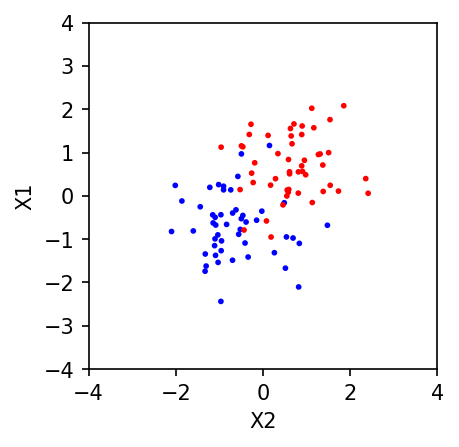

In [174]:
x1min, x1max = -4, 4
x2min, x2max = -4, 4

fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.scatter(X[:, 0], X[:, 1], s=3,
            c=['red' if c == 1 else 'blue' for c in Y])
ax.set_xlim([x1min, x1max])
ax.set_ylim([x2min, x2max])
ax.set_ylabel('X1')
ax.set_xlabel('X2')
plt.show()

In [162]:
def logisticF(x, params):
    # params[1:].view(-1,1) => shape (2,1)
    # x @ (2,1) => shape (N,1)
    z = x @ params[1:].view(-1, 1) + params[0]
    return 1.0 / (1.0 + torch.exp(-z)) 


In [175]:
def log_loss(ypred, ytrue):
    """
    Cross-entropy loss for binary classification.
    ypred, ytrue both shape (N, 1).
    """
    # To avoid log(0), clamp predictions
    ypred_clamp = torch.clamp(ypred, 1e-7, 1 - 1e-7)
    return -torch.mean(
        ytrue * torch.log(ypred_clamp) +
        (1 - ytrue) * torch.log(1 - ypred_clamp)
    )

torch.Size([100, 2]) 10


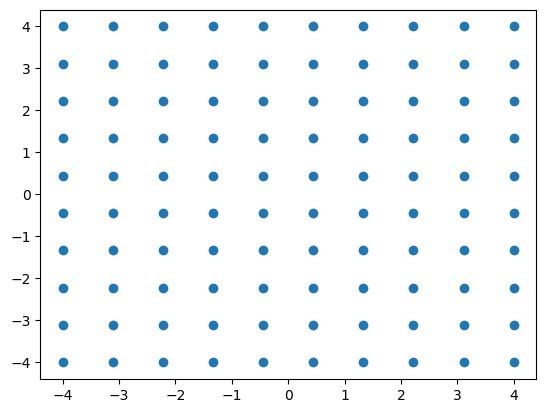

In [176]:
s = torch.linspace(x1min, x1max, steps=10)
wh = len(s)

X_eval = torch.tensor([[x , y] for x in s for y in s])

print(X_eval.shape, wh)

plt.scatter(X_eval[:, 0], X_eval[:, 1])

Step 0, Loss: 0.7785544991493225, Params: tensor([0.0669, 0.2933, 0.6774])
Step 1, Loss: 0.7785041928291321, Params: tensor([0.0669, 0.2931, 0.6772])
Step 2, Loss: 0.7784539461135864, Params: tensor([0.0669, 0.2930, 0.6770])
Step 3, Loss: 0.7784036993980408, Params: tensor([0.0669, 0.2929, 0.6768])
Step 4, Loss: 0.7783535122871399, Params: tensor([0.0669, 0.2927, 0.6767])
Step 5, Loss: 0.778303325176239, Params: tensor([0.0669, 0.2926, 0.6765])
Step 6, Loss: 0.7782531380653381, Params: tensor([0.0668, 0.2925, 0.6763])
Step 7, Loss: 0.778203010559082, Params: tensor([0.0668, 0.2923, 0.6761])
Step 8, Loss: 0.7781528830528259, Params: tensor([0.0668, 0.2922, 0.6759])
Step 9, Loss: 0.7781028151512146, Params: tensor([0.0668, 0.2921, 0.6758])
Step 10, Loss: 0.7780527472496033, Params: tensor([0.0668, 0.2919, 0.6756])
Step 11, Loss: 0.7780028581619263, Params: tensor([0.0668, 0.2918, 0.6754])
Step 12, Loss: 0.7779527306556702, Params: tensor([0.0668, 0.2917, 0.6752])
Step 13, Loss: 0.7779026

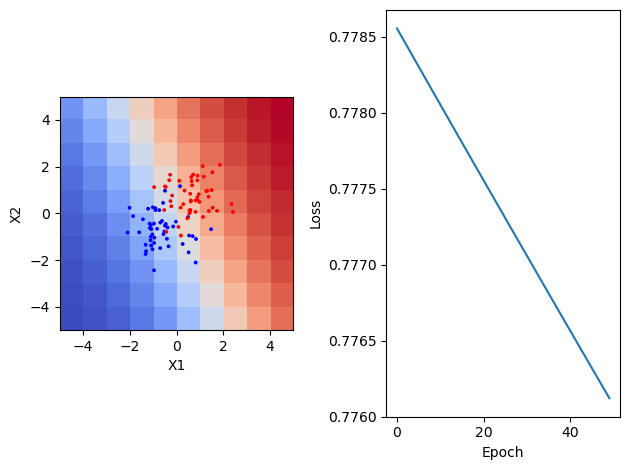

In [178]:
history = {'loss': []}

params = torch.rand(3, requires_grad=True)

# Define a simple learning rate
learning_rate = 1e-3

# Number of gradient descent steps
num_steps = 50

for step in range(num_steps):
    ypred = logisticF(X, params)
    # Forward pass 
    loss = log_loss(ypred, Y)

    history['loss'].append(loss.item())

    y_eval = logisticF(X_eval, params)
    y_eval = y_eval.detach().numpy()
    labels_img = y_eval.reshape(wh, wh)
    # print(y_eval)

    # Backward pass
    loss.backward()

    # Update parameters using gradient descent
    with torch.no_grad():
        params -= learning_rate * params.grad

    # Zero gradients before the next iteration
    params.grad.zero_()

    print(f"Step {step}, Loss: {loss.item()}, Params: {params.data}")

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X[:, 0], X[:, 1], s=3,
            c=['red' if c == 1 else 'blue' for c in Y])
ax[0].imshow(labels_img, cmap='coolwarm', extent=(-5, 5, -5, 5), origin='lower')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

ax[1].plot(history['loss'])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()
